# Case Study Overview

**Yourcabs.com** faces a critical business issue: *drivers frequently cancel scheduled rides, leaving customers stranded and dissatisfied.* 


Using historical booking data, your task is to build a predictive model to classify rides as **"cancelled"** or **"not cancelled."**

# Importing required packages

In [11]:
# For performing operation on dataframe
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Importing objects to build NN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the data file

In [3]:
taxi_df = pd.read_csv("Taxi-cancellation-case.csv")

In [4]:
taxi_df.head()

,row#,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,1,17712,12,NaN,2,1021.0,1323.0,NaN,NaN,41275.94,NaN,0,0,41275.33403,13.028530,77.54625,12.869805,77.653211,0
1,2,17037,12,NaN,2,455.0,1330.0,NaN,NaN,41275.53,NaN,0,0,41275.41597,12.999874,77.67812,12.953434,77.706510,0
2,3,761,12,NaN,2,814.0,393.0,NaN,NaN,41276.02,41277.0,1,0,41275.50972,12.908993,77.68890,13.199560,77.706880,0
3,4,868,12,NaN,2,297.0,212.0,NaN,NaN,41275.55,NaN,0,0,41275.52917,12.997890,77.61488,12.994740,77.607970,0
4,5,21716,28,NaN,2,1237.0,330.0,NaN,NaN,41275.69,NaN,0,0,41275.62986,12.926450,77.61206,12.858833,77.589127,0


## EDA and Data Cleaning

**Visualization Overall Cancellation rate**

<Axes: xlabel='Car_Cancellation', ylabel='user_id'>

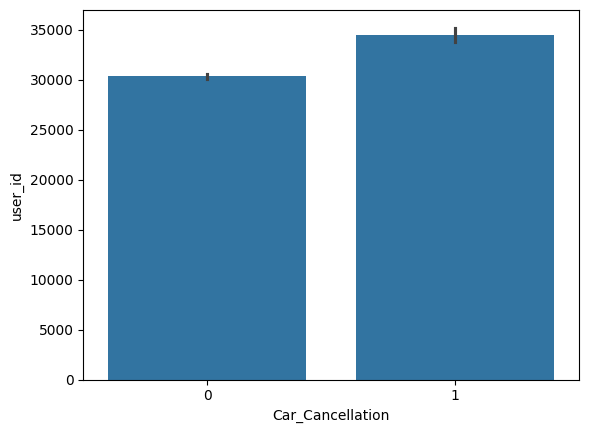

In [15]:
sns.barplot(taxi_df, x = "Car_Cancellation", y = "user_id")

### Looking into missing values

<Axes: >

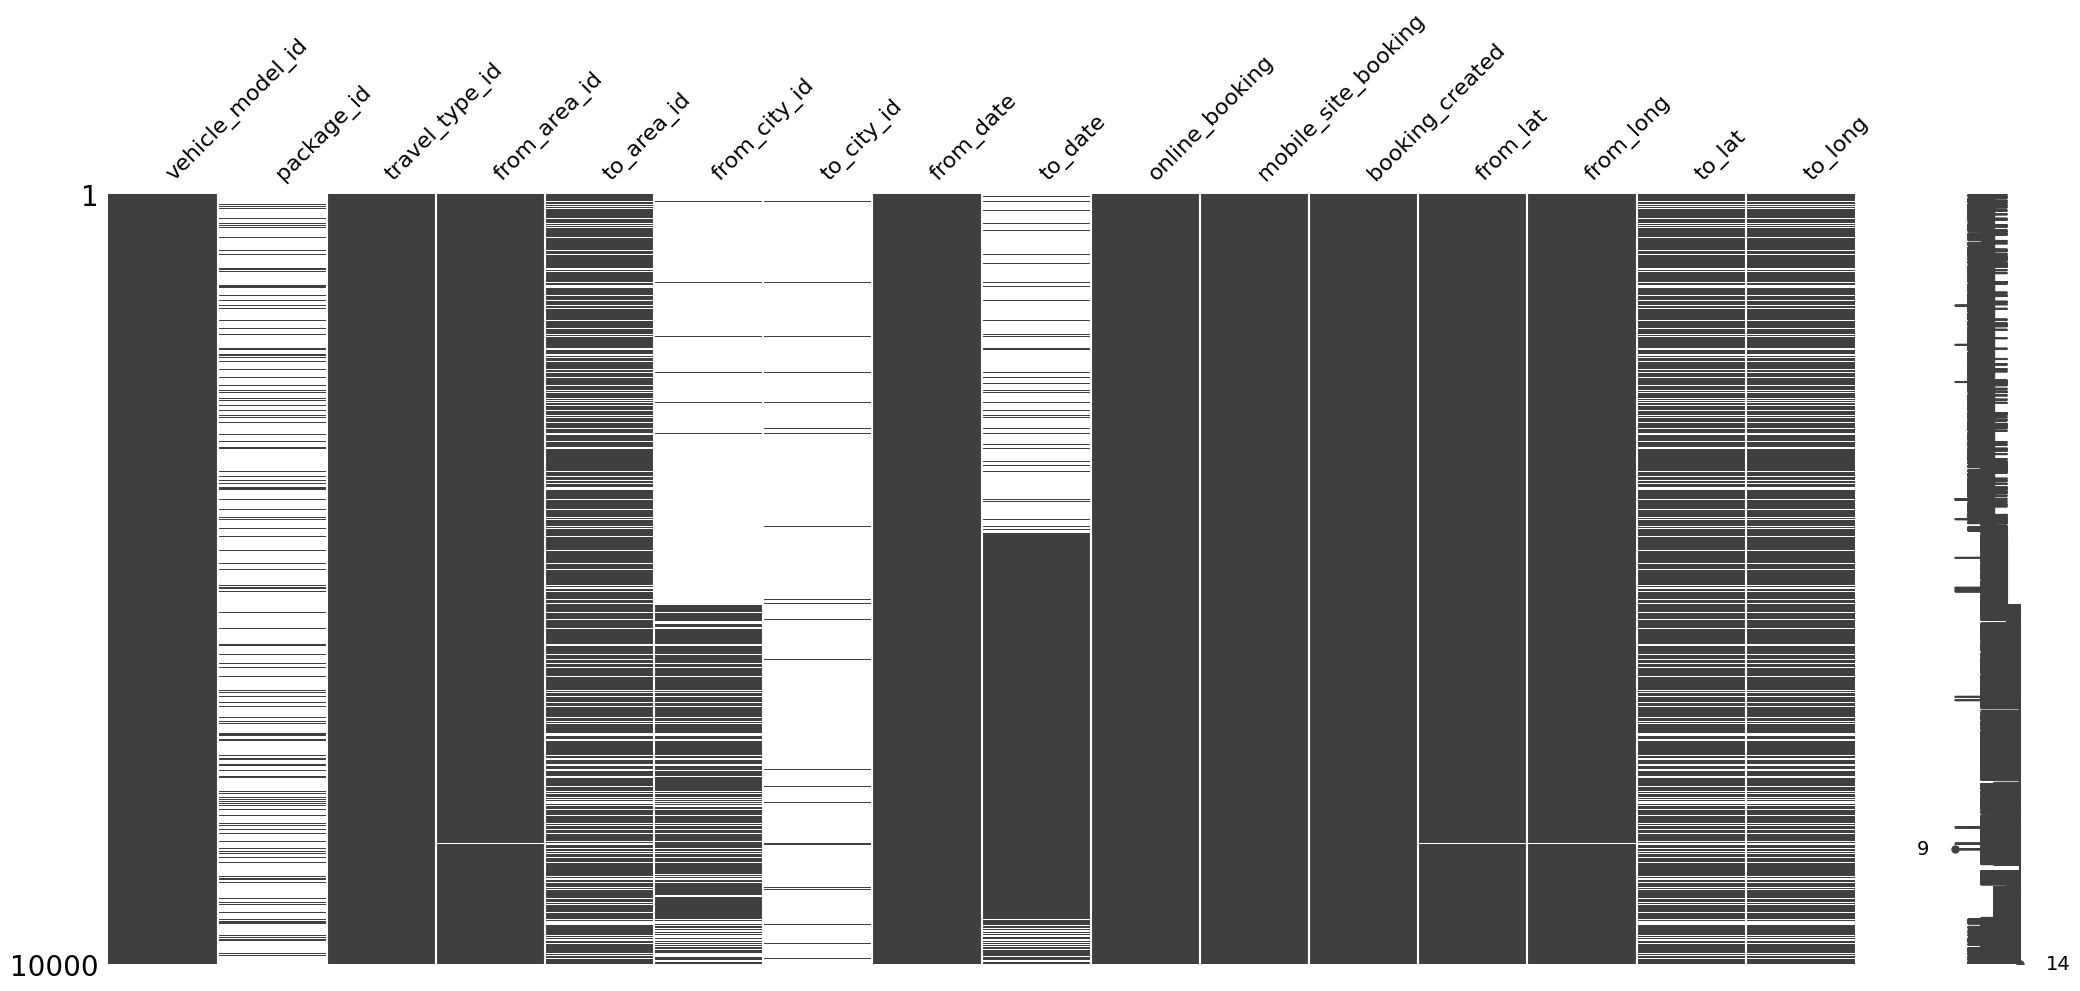

In [33]:
# This library help us visualize missing values :)
import missingno as msno
msno.matrix(taxi_df[selected_features])

In [41]:
# Percentage of missing values
missing_percentage = (taxi_df.isnull().sum() / len(taxi_df)) * 100

# Filter columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage

package_id      82.48
from_area_id     0.15
to_area_id      20.91
from_city_id    62.94
to_city_id      96.61
to_date         41.78
from_lat         0.15
from_long        0.15
to_lat          20.91
to_long         20.91
dtype: float64

**Criteria for dropping the features: >70%**

**Imputing the missing values: <40-50%**

In [44]:
# Dropping the following features 'package_id', 'from_city_id', 'to_city_id'
taxi_df.drop(['package_id', 'from_city_id', 'to_city_id'], axis = 1, inplace = True)

KeyError: "['package_id', 'from_city_id', 'to_city_id'] not found in axis"

### **Visualizing the distribution of Features by Car_Cancellation**

In [46]:
taxi_df.columns[2:-1].shape

(13,)

C:\Users\shyam\AppData\Local\Temp\ipykernel_4104\3620117480.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = taxi_df, x = feature, hue = "Car_Cancellation", ax=axes[i], fill=True)


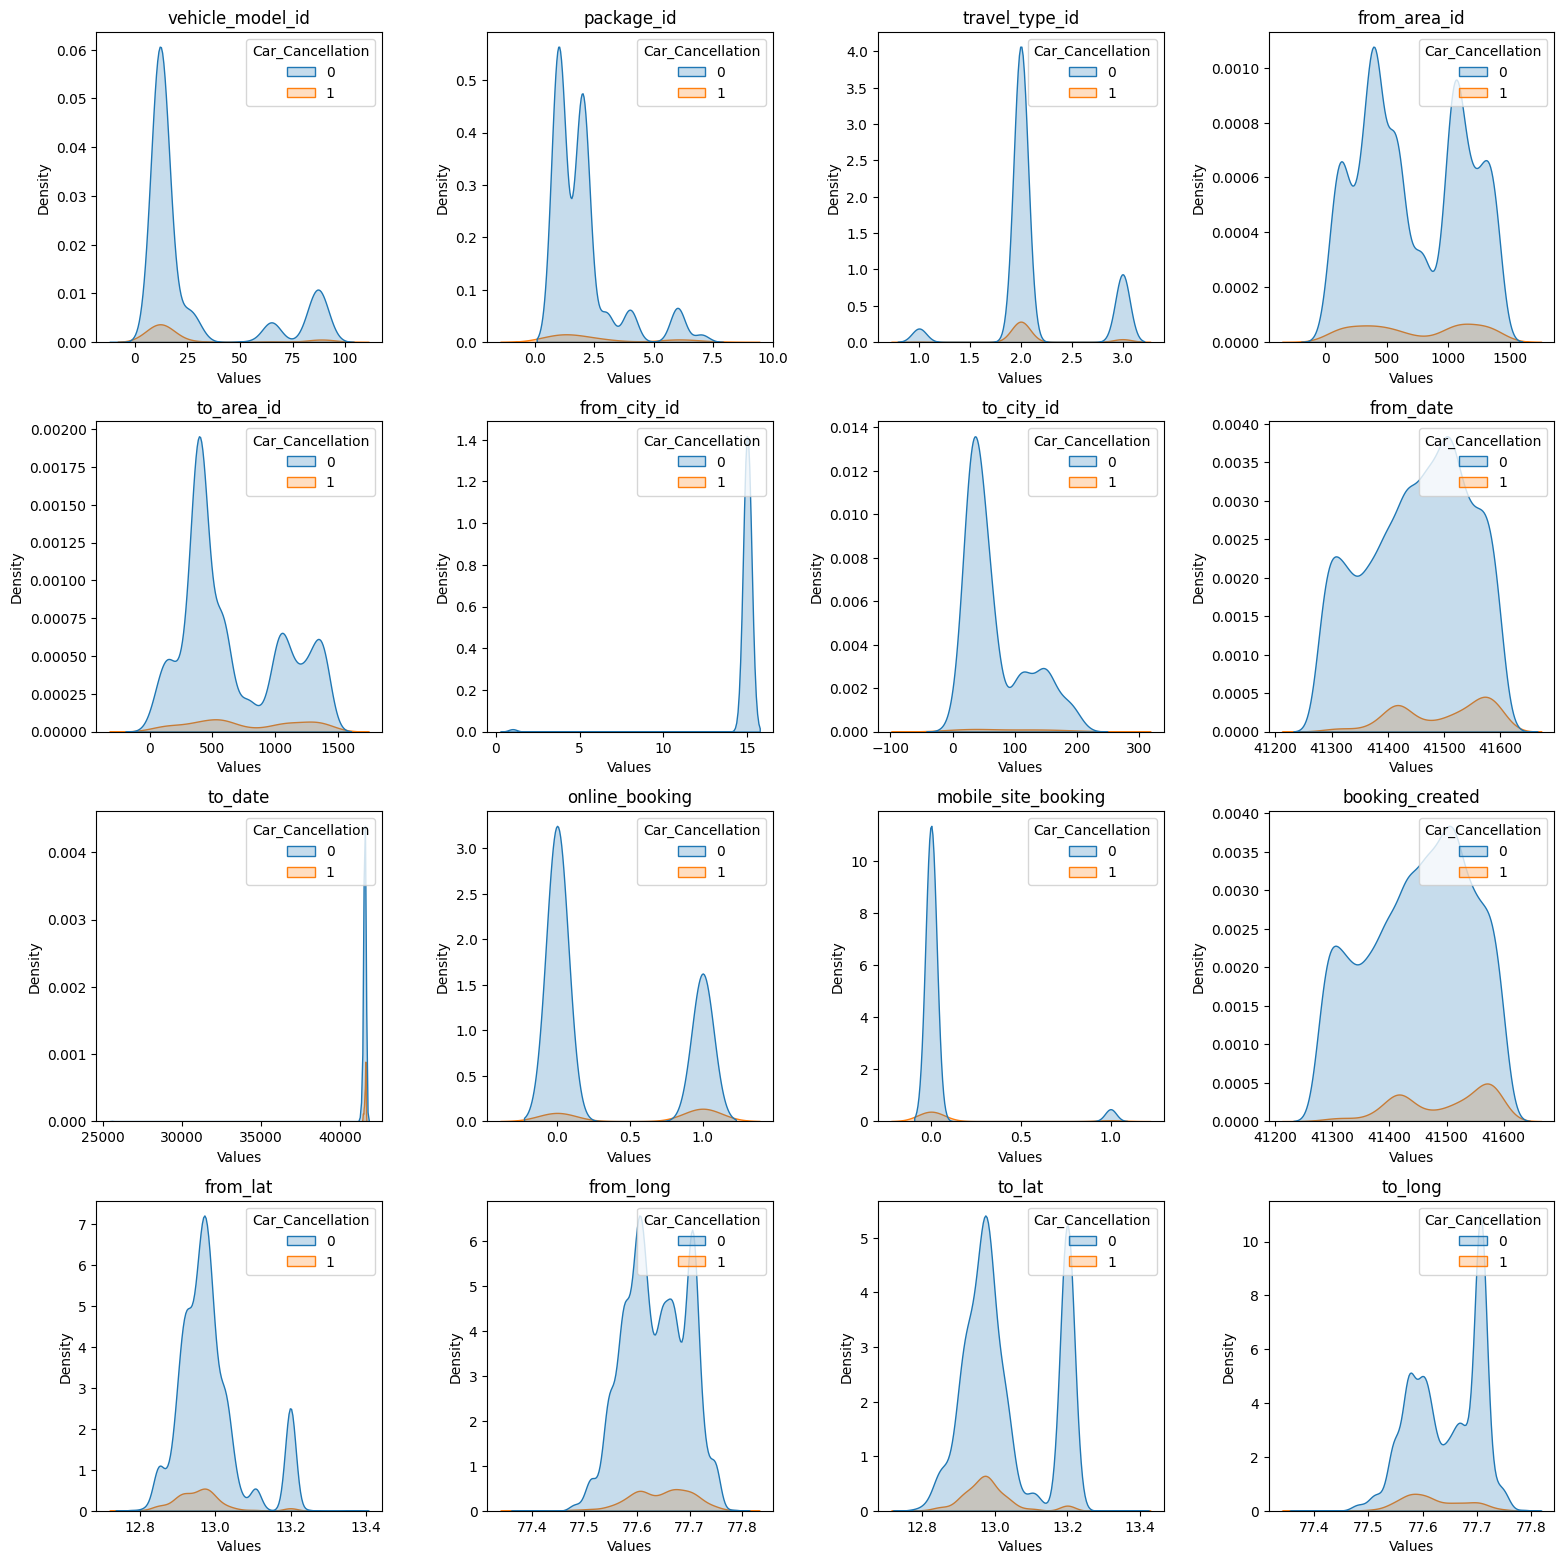

In [31]:
# Selecting the features to visualize their distribution
selected_features = taxi_df.columns[2:-1]

# Creating a 4x4 subplot 
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (16,16))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    sns.kdeplot(data = taxi_df, x = feature, hue = "Car_Cancellation", ax=axes[i], fill=True)
    axes[i].set_title(feature, fontsize=12)
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Density')

plt.tight_layout(pad=2.0, h_pad=1.0)

## Train-Test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardizing the data

In [ ]:
# Scaling the data so that model can be train on features with same scale of value.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Developing the Neural Network

In [ ]:
model = Sequential([
    Dense( /, input_dim = , activation = 'relu'),
    Dense( /, input_dim = , activation = 'relu'),
    Dense( 2, input_dim = , activation = 'sigmoid'),
])